# Learning Sklearn with Linear Models
[Scikit-Learn](https://scikit-learn.org/) (sklearn) is the most popular library for "conventional" (e.g., non-deep-learning) machine learning for good reason. 
The library has an impressive collection of machine leanring algorithms and the tools needed to use them effectively in many applications, including tools that make validating a machine learning model simple. 
This notebook will start off by teaching you the fundamnetals of the "BaseEstimator" models and how to combine them in pipelines to create effective models.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import os

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
np.random.seed(123)

Configuration variables

In [3]:
n_points = 32

## A Timeless Stand-by: Linear Regression
All machine learning models and many utility tools in sklearn all follow the same pattern defined by the "BaseEstimator." 

### Creating a Linear Regression with the Desired Settings

The first place to start out with is how to configure a "BaseEstimator." Each BaseEstimator is a Python object that can be created with different settings during model creation. 

In [4]:
lr = LinearRegression()
lr

LinearRegression()

Note how printing the object's value tells you which settings are available and what their current values are. 

*Python Note*: Sklearn detects these options by reading the signature on the `__init__` function of the class.

In [5]:
help(LinearRegression.__init__)

Help on function __init__ in module sklearn.linear_model._base:

__init__(self, *, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
    Initialize self.  See help(type(self)) for accurate signature.



You can retrieve or set these options by setting the attributes of the object

In [6]:
lr.fit_intercept

True

In [7]:
lr.fit_intercept = False
lr.fit_intercept

False

Add also through the `get_params` and `set_params` methods

In [8]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': False,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [9]:
lr.set_params(fit_intercept=True)

LinearRegression()

These setting operations provide you different ways of changing how a machine learning model learns (e.g., `fit_intercept` controls whether we determine a non-zero intercept for the model), performance information (e.g., whether it uses more than one parallel job when evlauting the model), or other details (e.g., printing debugging information). 

The other kind of state an "estimator object" holds are the information learned from data.

### Fitting a Model
Once you define the proper settings, the next step is to use a model object to learn from data.

We'll use a simple example with some linear data.

In [10]:
X = np.random.uniform(0, 10, (n_points, 1))  # 2D array with one column

In [11]:
y = 2 * X + 1 + np.random.normal(size=(n_points, 1))

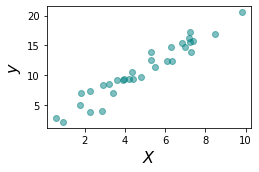

In [12]:
fig, ax = plt.subplots(figsize=(3.7, 2.5))

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color='teal', alpha=0.5)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)

fig.tight_layout()

All machine leanring models in sklearn provide a `fit` operation that runs the machine learning algorithm to learn the weighs of the model for the data.

In [13]:
lr.fit(X, y)  # For supervised learning, it takes the inputs and outputs

LinearRegression()

All of the information extracted from the model are stored in attributes with an underscore at the end

In [14]:
lr.coef_

array([[1.94810487]])

Note how the model coefficients are close to 2, the slope we input to our model.

Now that our model contains the weights needed to make predictions, we call the `predict` option on new data

In [15]:
x_eval = np.linspace(0, 10, 32)[:, None]
# [:, None] turns the array from a 1D shape (32,) to a 2D shape (32, 1).
#  sklearn requires input arrays be 2D

In [16]:
y_pred = lr.predict(x_eval)

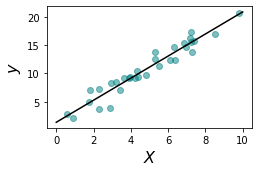

In [17]:
fig, ax = plt.subplots(figsize=(3.7, 2.5))

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_eval, y_pred, 'k')

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)

fig.tight_layout()

Awesome! You've now fit your first machine leanring model.

**Now it's your turn to write some code** Fit a model without `fit_intercept=False` and make predictions using `x_eval`. Name that model `lr_2` and the predictions `y_pred_2`.

In [18]:
raise NotImplementedError()

The answer is hidden in the box below. Double-click to see it.
<div  style="display: none;">
lr_2 = LinearRegression(fit_intercept=False)
lr_2.fit(X, y)
y_pred_2 = lr_2.predict(x_eval)
</div>

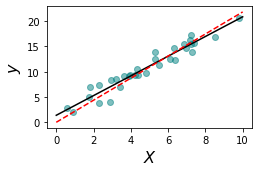

In [19]:
fig, ax = plt.subplots(figsize=(3.7, 2.5))

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_eval, y_pred, 'k', label='intercept')
ax.plot(x_eval, y_pred_2, 'r--', label='no intercept')

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)

fig.tight_layout()

The following block will raise an error if you've made a mistake

In [20]:
assert lr_2.intercept_ == 0

## Measuring Performance
The next critical element of using sklearn is to measure the performance of different models.

As we'll discuss in lecture, there are many ways to measure model performance and they are all stored in the `sklearn.metrics` module.

In [21]:
from sklearn import metrics

As an example, we'll compute the mean absolute error for both the "with" and "without" 

In [22]:
y_pred = lr.predict(X)  # Predict on the points where we have training data
lr_mae = metrics.mean_absolute_error(y_pred, y)

In [23]:
y_pred_2 = lr_2.predict(X)  # Predict on the points where we have training data
lr_2_mae = metrics.mean_absolute_error(y_pred_2, y)

In [24]:
print(f'With intercept: MAE={lr_mae:.1f} - Without intercept: MAE={lr_2_mae:.1f}')

With intercept: MAE=0.9 - Without intercept: MAE=1.1


**Your turn**: Compare the "mean squared error" between the two models

In [25]:
raise NotImplementedError()
print(f'With intercept: MSE={lr_mse:.1f} - Without intercept: MAE={lr_2_mse:.1f}')

With intercept: MSE=1.4 - Without intercept: MAE=1.7


Click here for answer

<div style='display: none'>
lr_mse = metrics.mean_squared_error(y, y_pred)
lr_2_mse = metrics.mean_squared_error(y, y_pred_2)
print(f'With intercept: MSE={lr_mse:.1f} - Without intercept: MAE={lr_2_mse:.1f}')
</div>

## Building Model Pipelines
A feature in sklearn you should end up using often is the ability to put multiple steps of a machine learnng model into a [same "Pipeline."](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

To demonstrate, we'll illustrate building a "polynomial regression" model by combining polynomial feature expansion with a linear regression model.

### Explaining Polynomial Features
To start, we'll create a quadratic dataset to learn from.

In [26]:
y = -0.6 * X * (X - 11) + np.random.normal(size=(n_points, 1))

Showing linear regression

In [27]:
lr = LinearRegression().fit(X, y)

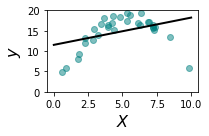

In [28]:
fig, ax = plt.subplots(figsize=(3, 2))

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, lr.predict(x_plot), 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.tight_layout()

See how our linear model fails to fit it. So, let's add in some polynomial features (e.g., $X^2$, $X^3$) to make it possible to learn a non-linear model.

We'll use the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) tool from sklearn to compute these features. It is also a `BaseEstimator` and, so, has the same functions for changing its settings

In [29]:
pf = PolynomialFeatures(degree=3, include_bias=False)
pf

PolynomialFeatures(degree=3, include_bias=False)

In [30]:
pf.get_params()

{'degree': 3, 'include_bias': False, 'interaction_only': False, 'order': 'C'}

Like the LinearRegression model, it also has a "fit" function that fits any needed parameters for how to run the feature expansion (e.g., knowing how many features to output)

In [31]:
pf.fit(X)

PolynomialFeatures(degree=3, include_bias=False)

In [32]:
pf.n_features_in_, pf.n_output_features_  # Note the "_" postfix used to mark "learned attributes"

(1, 3)

Instead of `predict`, PolynomialFeatures has a `transform` function to "transform" the data by creating polynomial features

In [33]:
X_poly = pf.transform(X)
X_poly[0, :]

array([  6.96469186,  48.50693265, 337.83583878])

See how the first column is $x$, followed by $x^2$ and $x^3$.

Now that you add these features, you can learn a linear regression model to create a polynomial regression model.

In [34]:
lr = lr.fit(X_poly, y)  # Side note: Fitting the model again clears the old weights

Now that we have the model, let's use it to make predictions. Doing so requires two steps:
1. Computing the new features
1. Running the model on the new features

In [35]:
X_plot_poly = pf.transform(x_plot)

In [36]:
y_plot = lr.predict(X_plot_poly)

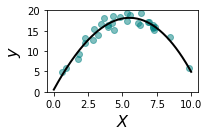

In [37]:
fig, ax = plt.subplots()

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, y_plot, 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.set_size_inches(3, 2)
fig.tight_layout()

Awesome! We now have a polynomial model but it is annoying to use because we have to run two steps.

### Using a Pipeline to combine transformation and learning steps
The Pipeline object we mentioned earlier lets you define a series of pre-processing steps into the same model.

Create one by defining a list of tuples of ('name of step', BaseEstimator object that does what you need).

In [38]:
pr = Pipeline([
    ('poly', PolynomialFeatures(degree=10)),
    ('lr', LinearRegression())
])

As the pipeline itself is a `BaseEstimator`, you can use the same methods to access and change parameters. 

The key thing to notice is that they add the name of the step and two underscores in front of the name

In [39]:
pr.set_params(poly__degree=3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())])

In [40]:
pr.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(degree=3)), ('lr', LinearRegression())],
 'verbose': False,
 'poly': PolynomialFeatures(degree=3),
 'lr': LinearRegression(),
 'poly__degree': 3,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': 'deprecated',
 'lr__positive': False}

The pipeline will run the steps you defined, passing the data from one step to the next for you. As example, let's fit and print the outputs

In [41]:
pr.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())])

In [42]:
y_plot = pr.predict(x_plot)

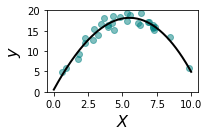

In [43]:
fig, ax = plt.subplots()

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, y_plot, 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.set_size_inches(3, 2)
fig.tight_layout()

Same procedure, much less problems!

## Exercise: Learning the best choice of parameters.
To test your knowledge, finish the script I have here for finding which parameters gives you the best model.

Our first step is to split our data into a training and validation set using sklearn's `train_test_split`. Given a set of X and y values plus some information on how to split them, this model will partition the data into two sets of X and y values.

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

In [46]:
print(f'X has {X.shape[0]} points, X_train has {X_train.shape[0]}, X_valid has {X_valid.shape[0]}')

X has 32 points, X_train has 24, X_valid has 8


Now, we'll run over many different polynomial degrees to find which degree gives the most generalizable model.

In [47]:
results = []
for n in range(1, 10):
    # Change the polynomial degree to n
    raise NotImplementedError()
    
    # Fit the model using X_train
    raise NotImplementedError()
    
    # Evaluate MAE on X_train and X_valid
    raise NotImplementedError
    
    # Add the outputs to an array for tracking them
    results.append({
        'n': n,
        'train_mae': train_mae,
        'valid_mae': valid_mae
    })
    
# Store the data as a Pandas DataFrame for easy analysis
results = pd.DataFrame(results)

Double-click for answer

<div style='display: none'>
results = []
for n in range(1, 10):
    # Change the polynomial degree to n
    pr.set_params(poly__degree=n)
    
    # Fit the model using X_train
    pr.fit(X_train, y_train)
    
    # Evaluate MAE on X_train and X_valid
    y_train_pred = pr.predict(X_train)
    y_valid_pred = pr.predict(X_valid)
    train_mae = metrics.mean_absolute_error(y_train, y_train_pred)
    valid_mae = metrics.mean_absolute_error(y_valid, y_valid_pred)
    
    # Add the outputs to an array for tracking them
    results.append({
        'n': n,
        'train_mae': train_mae,
        'valid_mae': valid_mae
    })
    
# Store the data as a Pandas DataFrame for easy analysis
results = pd.DataFrame(results)
</div>

Plot the results

Text(0, 0.5, 'MAE')

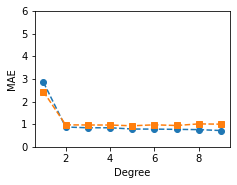

In [48]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.plot(results['n'], results['train_mae'], '--o', label='Train')
ax.plot(results['n'], results['valid_mae'], '--s', label='Validation')

ax.set_ylim(0, 6)

ax.set_xlabel('Degree')
ax.set_ylabel('MAE')

See how the training error gets continually lower as we add more terms, but the validation goes up after ~3 terms. The rapid increasing in error is "overfitting." Our next notebooks will focus on the tools sklearn has for evaluating overfitting.